In [1]:
import pandas as pd

data = pd.read_csv("dia_madre.csv")
data.head()

,tweet,date,city,lat,lon
0,#ParoNacional6M marica todos en el centro y su...,2021-05-06 16:44:19,Bogotá,4.649178,-74.062827
1,En la CCCE creemos que un día no es suficiente...,2021-05-06 16:28:48,Bogotá,4.649178,-74.062827
2,@Compensar_info buen día ya realicé la actuali...,2021-05-06 16:16:40,Bogotá,4.649178,-74.062827
3,"Gordo, te acuerdas cuando un país se movilizó ...",2021-05-06 16:12:20,Bogotá,4.649178,-74.062827
4,@Annge_myg Creería que quiere aprovechar el fi...,2021-05-06 15:49:45,Bogotá,4.649178,-74.062827


In [2]:
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

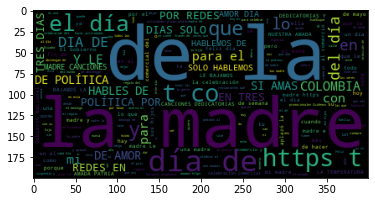

In [3]:
palabras = data.tweet.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()


In [4]:
import re 

stopwords.extend(["https", "co", "día", "dia", "madres", "madre"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.tweet.apply(lambda texto: pre_procesado(texto))
data.head()

,tweet,date,city,lat,lon,pp
0,#ParoNacional6M marica todos en el centro y su...,2021-05-06 16:44:19,Bogotá,4.649178,-74.062827,paronacional m marica centro sur haciendo paro...
1,En la CCCE creemos que un día no es suficiente...,2021-05-06 16:28:48,Bogotá,4.649178,-74.062827,ccce creemos suficiente celebrar mamá queremos...
2,@Compensar_info buen día ya realicé la actuali...,2021-05-06 16:16:40,Bogotá,4.649178,-74.062827,compensar info buen realicé actualización dato...
3,"Gordo, te acuerdas cuando un país se movilizó ...",2021-05-06 16:12:20,Bogotá,4.649178,-74.062827,gordo acuerdas país movilizó muerte violenta s...
4,@Annge_myg Creería que quiere aprovechar el fi...,2021-05-06 15:49:45,Bogotá,4.649178,-74.062827,annge myg creería quiere aprovechar fin semana...


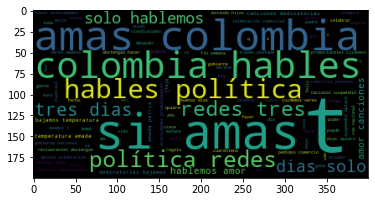

In [5]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

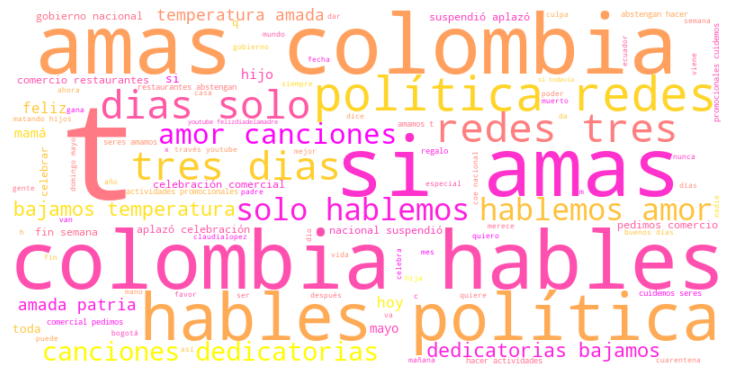

In [6]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
# CARGAR IMAGEN 
img = PIL.Image.open("flower2.png")
# display(img)
  
mask = np.array(img)

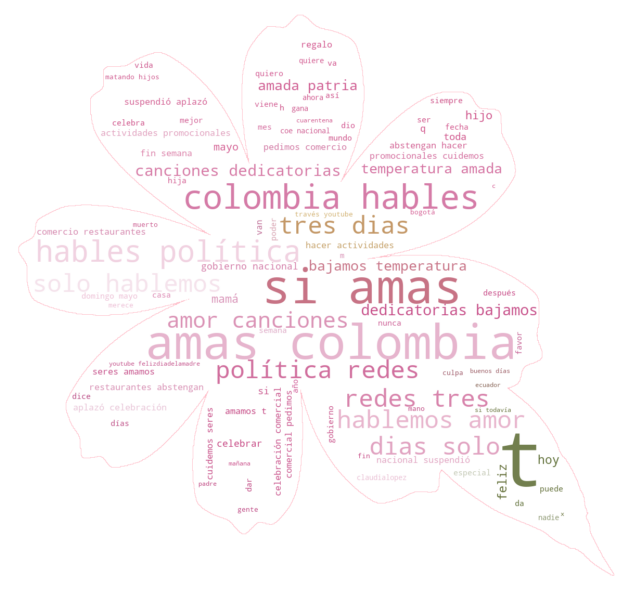

In [13]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

image_colors=ImageColorGenerator(mask)

# wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
# data.city.value_counts()
# Tabla 1 para TABLEAU

# Nube de palabras & Mapa de árbol

ciudad1 = "Cali"
ciudad2 = "Armenia"

data1 = data[data.city==ciudad1]
data2 = data[data.city==ciudad2]

palabras1 = data1.pp.str.cat(sep=" ")
palabras2 = data2.pp.str.cat(sep=" ")

wordcloud1 = WordCloud().generate(palabras1).words_
wordcloud2 = WordCloud().generate(palabras2).words_

temp1 = pd.DataFrame.from_dict(wordcloud1, orient='index').reset_index()
temp1.columns = ['palabra', 'peso']
temp1['ciudad'] = ciudad1

temp2 = pd.DataFrame.from_dict(wordcloud2, orient='index').reset_index()
temp2.columns = ['palabra', 'peso']
temp2['ciudad'] = ciudad2

data_nube = pd.concat([temp1, temp2])

data_nube.to_csv("nube.csv", index=False)

In [16]:
# Tabla 2

# Mapa

data['contador_palabras'] = data.pp.apply(lambda texto: len(texto.split()))
data[['city', 'lat', 'lon', 'contador_palabras']].to_csv("mapa.csv", index=False)
